In [1]:
# Impor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json

In [2]:
# Tentukan jalur dataset
train_dir = r'C:\Users\HP-GK\Kompor CNN\train'
val_dir = r'C:\Users\HP-GK\Kompor CNN\val'
test_dir = r'C:\Users\HP-GK\Kompor CNN\test'

In [3]:
# Pra-pemrosesan data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Muat data train, validation, dan test
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary')

Found 420 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [13]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Karena hanya ada 2 kelas, gunakan sigmoid sebagai aktivasi output layer
])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 42, 42, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [15]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
# Latih model dengan data train dan evaluasi dengan data validation
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
14/14 [==============================] - 120s 9s/step - loss: 0.7394 - accuracy: 0.5810 - val_loss: 0.6162 - val_accuracy: 0.6750
Epoch 2/10
14/14 [==============================] - 95s 7s/step - loss: 0.4987 - accuracy: 0.7905 - val_loss: 0.3716 - val_accuracy: 0.8917
Epoch 3/10
14/14 [==============================] - 74s 5s/step - loss: 0.3210 - accuracy: 0.8810 - val_loss: 0.3598 - val_accuracy: 0.8417
Epoch 4/10
14/14 [==============================] - 77s 6s/step - loss: 0.2483 - accuracy: 0.8952 - val_loss: 0.3660 - val_accuracy: 0.8000
Epoch 5/10
14/14 [==============================] - 87s 6s/step - loss: 0.2103 - accuracy: 0.9024 - val_loss: 0.2949 - val_accuracy: 0.9000
Epoch 6/10
14/14 [==============================] - 81s 6s/step - loss: 0.1525 - accuracy: 0.9333 - val_loss: 0.2957 - val_accuracy: 0.8917
Epoch 7/10
14/14 [==============================] - 83s 6s/step - loss: 0.1385 - accuracy: 0.9452 - val_loss: 0.2589 - val_accuracy: 0.9250
Epoch 8/10
14/14 [=

In [17]:
def plot_graphs(history):
    # Membaca akurasi dan loss dari objek history
    accuracy = history.history['accuracy']
    loss = history.history['loss']
    
    # Membaca akurasi dan loss dari objek history untuk data validasi
    val_accuracy = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    
    # Mengatur ukuran gambar
    plt.figure(figsize=(12, 6))
    
    # Membuat subplot untuk grafik akurasi
    plt.subplot(1, 2, 1)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Membuat subplot untuk grafik loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Menampilkan grafik
    plt.tight_layout()
    plt.show()


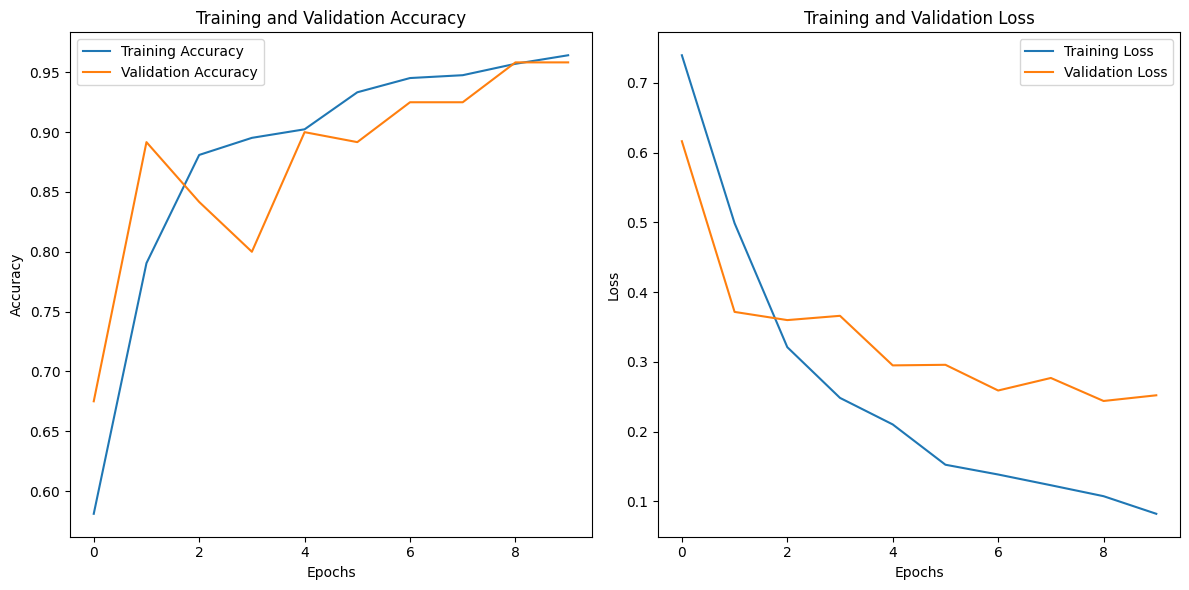

In [18]:
plot_graphs(history)

In [24]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

2/2 [==============================] - 8s 5s/step - loss: 0.3501 - accuracy: 0.8833
Test Loss: 0.35008975863456726
Test Accuracy: 0.8833333253860474


In [25]:
# Prediksi label dari data test
test_images, test_labels = test_generator.next()
predicted_labels = model.predict(test_images)
predicted_labels = np.round(predicted_labels).flatten()

1/1 [==============================] - 0s 282ms/step


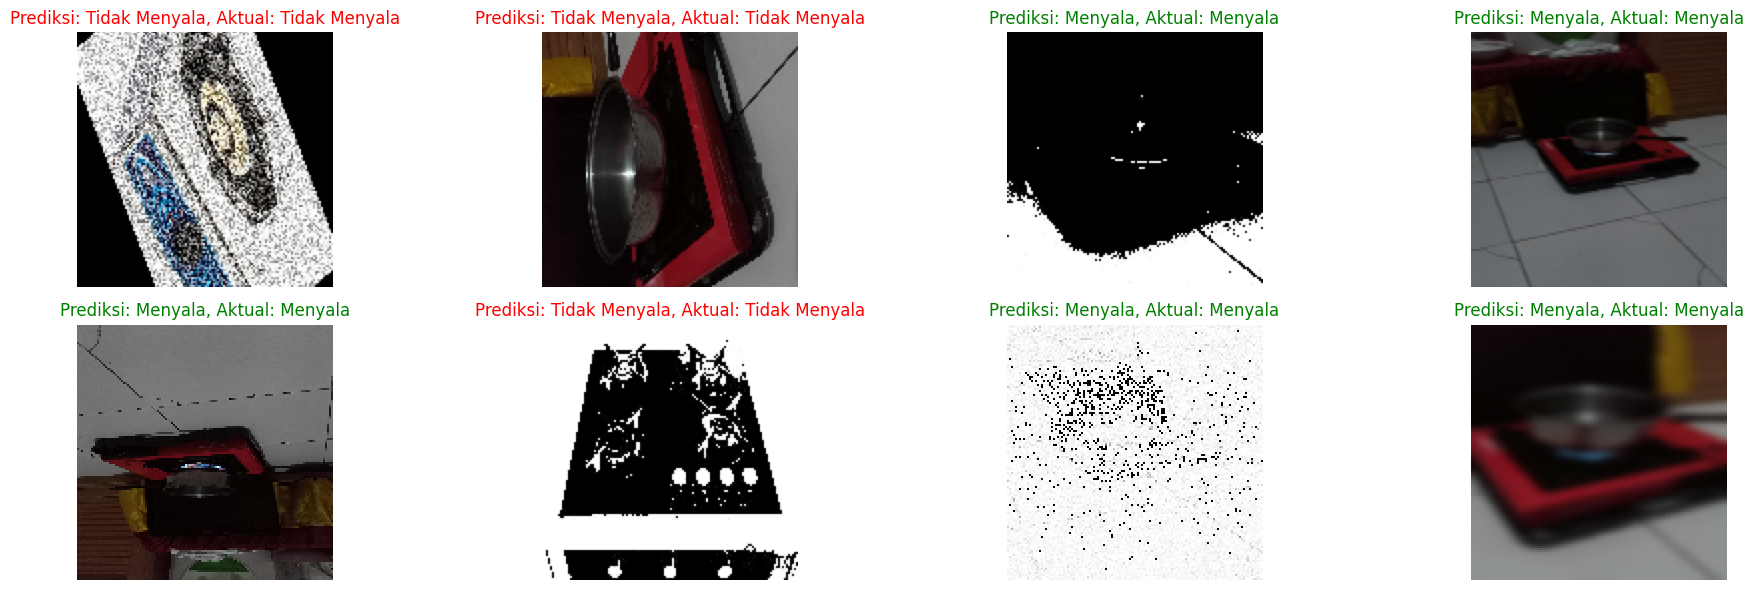

In [38]:
# Tampilkan gambar dan label dari data test
plt.figure(figsize=(20, 6))
num_images = min(test_images.shape[0], 8)
for i in range(num_images):
    ax = plt.subplot(2, 4, i + 1)
    ax.imshow(test_images[i])
    if test_labels[i] == 0.0:
        color = 'green'
        label = 'Menyala'
    else:
        color = 'red'
        label = 'Tidak Menyala'
    ax.set_title(f"Prediksi: {label}, Aktual: {label}", color=color)
    ax.axis("off")
plt.tight_layout()
plt.show()

In [39]:
# Buat confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

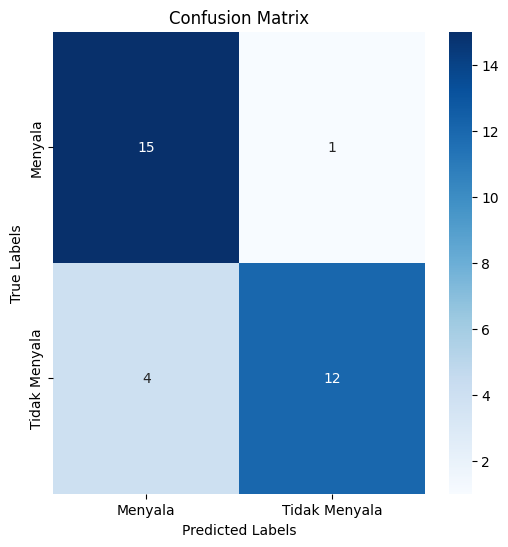

In [40]:
# Tampilkan confusion matrix dengan seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Menyala', 'Tidak Menyala'], yticklabels=['Menyala', 'Tidak Menyala'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [41]:
# Ubah nilai aktual dan prediksi menjadi kategori "Menyala" dan "Tidak Menyala"
test_labels_cat = ['Menyala' if label == 0 else 'Tidak Menyala' for label in test_labels]
predicted_labels_cat = ['Menyala' if label == 0 else 'Tidak Menyala' for label in predicted_labels]

In [42]:
# Tampilkan ringkasan akurasi, presisi, dan f1-score
report = classification_report(test_labels_cat, predicted_labels_cat)
print("Classification Report:")
print(report)

Classification Report:
               precision    recall  f1-score   support

      Menyala       0.79      0.94      0.86        16
Tidak Menyala       0.92      0.75      0.83        16

     accuracy                           0.84        32
    macro avg       0.86      0.84      0.84        32
 weighted avg       0.86      0.84      0.84        32



In [47]:
# Simpan model ke dalam file
model.save("model.h5")
print("Model telah disimpan.")

Model telah disimpan.


In [45]:
# Konversi model ke JSON
model_json = model.to_json()

In [46]:
# Tulis model JSON ke file
with open("model.json", "w") as json_file:
    json_file.write(model_json)
print("Model telah disimpan dalam bentuk JSON.")

Model telah disimpan dalam bentuk JSON.
